# How to inspect model fit results

In [1]:
from rlssm.utility.utils import load_model_results

# load non-hierarchical DDM fit:
model_fit_ddm = load_model_results('DDM.pkl')

# load non-hierarchical LBA fit:
model_fit_lba = load_model_results('LBA_2A.pkl')

# load hierarchical RL fit:
model_fit_rl = load_model_results('hierRL_2A.pkl')

## Posteriors

The posterior samples are stored in `samples`:

In [2]:
model_fit_ddm.samples

transf_drift  transf_ndt  transf_threshold
0         0.624687    0.228781           1.31002
1         0.625416    0.226004           1.25276
2         0.635599    0.226298           1.26460
3         0.767183    0.223195           1.27625
4         0.702878    0.226224           1.32400
...            ...         ...               ...
3995      0.747466    0.229504           1.26245
3996      0.740973    0.233706           1.27269
3997      0.813081    0.232161           1.27020
3998      0.626135    0.233678           1.25335
3999      0.663176    0.236549           1.25483

[4000 rows x 3 columns]

In [3]:
model_fit_rl.samples.describe()

sensitivity_sbj[1]  sensitivity_sbj[2]  sensitivity_sbj[3]  \
count         2000.000000         2000.000000         2000.000000   
mean             0.339849            0.364533            0.190238   
std              0.069954            0.160575            0.036556   
min              0.196754            0.095116            0.119604   
25%              0.294921            0.245157            0.167763   
50%              0.327211            0.333742            0.183969   
75%              0.371227            0.451924            0.205734   
max              0.833440            1.162270            0.542808   

       sensitivity_sbj[4]  sensitivity_sbj[5]  sensitivity_sbj[6]  \
count         2000.000000         2000.000000         2000.000000   
mean             0.285619            0.220674            0.343620   
std              0.060759            0.034586            0.082084   
min              0.134919            0.138828            0.189317   
25%              0.247989            0.197696            0.289452   
50%              0.275916            0.217280            0.327081   
75%              0.311664            0.238244            0.380652   
max              1.213840            0.486055            0.859148   

       sensitivity_sbj[7]  sensitivity_sbj[8]  sensitivity_sbj[9]  \
count         2000.000000         2000.000000         2000.000000   
mean             0.446074            0.212259            0.262786   
std              0.083316            0.033923            0.033846   
min              0.228258            0.126466            0.167168   
25%              0.388789            0.190456            0.238244   
50%              0.435810            0.208340            0.260954   
75%              0.495043            0.229227            0.284772   
max              0.894784            0.647509            0.378760   

       sensitivity_sbj[10]  ...  alpha_sbj[18]  alpha_sbj[19]  alpha_sbj[20]  \
count          2000.000000  ...    2000.000000    2000.000000    2000.000000   
mean              0.399321  ...       0.090050       0.199066       0.162357   
std               0.141355  ...       0.115876       0.091330       0.052897   
min               0.143001  ...       0.000553       0.016875       0.026814   
25%               0.295500  ...       0.008470       0.132509       0.126342   
50%               0.377563  ...       0.022957       0.183479       0.156974   
75%               0.468629  ...       0.152240       0.253000       0.192662   
max               1.167760  ...       0.596992       0.612426       0.389304   

       alpha_sbj[21]  alpha_sbj[22]  alpha_sbj[23]  alpha_sbj[24]  \
count    2000.000000    2000.000000    2000.000000    2000.000000   
mean        0.098040       0.132931       0.065796       0.167340   
std         0.028094       0.047145       0.021744       0.060112   
min         0.030649       0.025752       0.022179       0.033862   
25%         0.078639       0.098462       0.050291       0.125051   
50%         0.094122       0.126364       0.062599       0.161722   
75%         0.114150       0.161270       0.077312       0.202151   
max         0.252465       0.349883       0.196590       0.446356   

       alpha_sbj[25]  alpha_sbj[26]  alpha_sbj[27]  
count    2000.000000    2000.000000    2000.000000  
mean        0.058865       0.044762       0.079488  
std         0.037520       0.056357       0.035978  
min         0.005696       0.002407       0.016248  
25%         0.033508       0.014230       0.054447  
50%         0.048693       0.025113       0.073069  
75%         0.074053       0.051454       0.097206  
max         0.435049       0.667668       0.306845  

[8 rows x 56 columns]

You can simply plot the model's posteriors using `plot_posteriors`: 

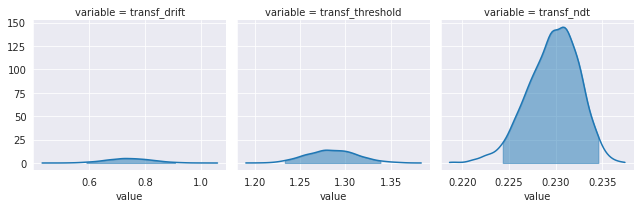

In [4]:
model_fit_ddm.plot_posteriors();

By default, 95% HDIs are shown, but you can also choose to have the posteriors without intervals or BCIs, and change the alpha level:

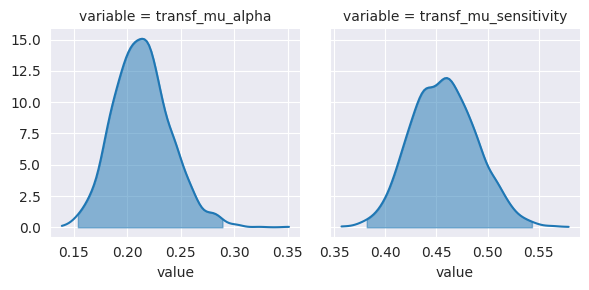

In [5]:
model_fit_rl.plot_posteriors(show_intervals='BCI', alpha_intervals=.01);

### Trial-level

Depending on the model specification, you can also extract certain trial-level parameters as numpy ordered dictionaries of n_samples X n_trials shape:

In [6]:
model_fit_ddm.trial_samples['drift_t'].shape

(4000, 400)

In [7]:
model_fit_ddm.trial_samples.keys()

dict_keys(['drift_t', 'threshold_t', 'ndt_t'])

In [8]:
model_fit_lba.trial_samples.keys() # for the LBA

dict_keys(['k_t', 'sp_trial_var_t', 'ndt_t', 'drift_cor_t', 'drift_inc_t', 'drift_trial_var', 'drift_variability_t'])

In the case of a RL model fit on choices alone, you can extract the log probability of accuracy=1 for each trial:

In [9]:
model_fit_rl.trial_samples.keys()

dict_keys(['log_p_t'])

In [10]:
model_fit_rl.trial_samples['log_p_t'].shape

(2000, 6464)

## Posterior predictives

With `get_posterior_predictives_df` you get posterior predictives as pandas DataFrames of `n_posterior_predictives` X `n_trials` shape:

In [11]:
pp = model_fit_rl.get_posterior_predictives_df(n_posterior_predictives=1000)
pp

variable accuracy                                               ...            \
trial        1    2    3    4    5    6    7    8    9    10    ... 6455 6456   
sample                                                          ...             
1               0    1    1    1    1    1    1    0    1    0  ...    1    1   
2               1    0    1    1    0    0    0    0    1    1  ...    1    1   
3               1    1    1    1    0    1    0    1    1    1  ...    1    1   
4               0    1    1    0    1    1    1    0    1    1  ...    0    1   
5               1    0    1    1    1    1    0    0    1    1  ...    0    0   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
996             1    0    0    1    1    0    0    1    1    1  ...    0    0   
997             0    1    1    1    0    1    0    0    1    1  ...    1    1   
998             0    1    1    0    0    1    0    1    1    1  ...    1    1   
999             0    1    1    0    0    1    1    0    1    1  ...    1    0   
1000            0    0    1    1    0    1    0    0    1    0  ...    1    1   

variable                                          
trial    6457 6458 6459 6460 6461 6462 6463 6464  
sample                                            
1           1    0    1    1    1    1    1    1  
2           1    1    1    0    1    1    1    0  
3           1    1    1    1    1    0    1    1  
4           1    0    1    0    1    1    1    1  
5           1    0    1    1    1    1    1    1  
...       ...  ...  ...  ...  ...  ...  ...  ...  
996         1    0    1    1    1    1    1    0  
997         1    1    1    1    1    0    1    0  
998         1    1    1    1    1    1    1    0  
999         1    1    1    1    1    1    1    1  
1000        1    0    1    0    1    1    1    1  

[1000 rows x 6464 columns]

For the DDM, you have additional parameters to tweak the DDM simulations, and you get a DataFrame with a hierarchical column index,  for RTs and for accuracy:

In [12]:
pp = model_fit_ddm.get_posterior_predictives_df(n_posterior_predictives=100, dt=.001)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         0.873781  0.687781  0.491781  0.416781  1.377781  0.309781   
2         0.905004  0.386004  0.492004  0.855004  0.361004  0.791004   
3         0.469298  0.604298  0.854298  0.543298  0.842298  0.875298   
4         0.374195  0.467195  0.424195  0.637195  0.311195  0.365195   
5         0.376224  0.533224  0.586224  0.309224  0.860224  0.838224   
...            ...       ...       ...       ...       ...       ...   
96        1.244331  0.485331  0.936331  0.904331  0.696331  0.469331   
97        0.490613  0.480613  0.282613  0.333613  1.939613  0.705613   
98        0.403750  1.478750  0.328750  0.439750  0.532750  0.336750   
99        0.486085  0.601085  0.446085  0.390085  0.572085  0.258085   
100       0.386266  0.426266  0.397266  1.218266  0.561266  0.511266   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      391  392  393  394   
sample                                            ...                           
1         0.592781  0.461781  0.301781  0.703781  ...      1.0  1.0  1.0  1.0   
2         0.654004  0.290004  1.991004  1.113004  ...      0.0  1.0  1.0  1.0   
3         0.323298  0.726298  1.038298  0.699298  ...      1.0  1.0  1.0  1.0   
4         0.630195  0.472195  0.631195  1.770195  ...      1.0  1.0  1.0  1.0   
5         0.443224  0.754224  0.932224  0.584224  ...      0.0  1.0  1.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        0.314331  0.883331  0.900331  0.355331  ...      1.0  0.0  0.0  1.0   
97        0.382613  0.441613  0.334613  0.393613  ...      1.0  0.0  1.0  1.0   
98        0.383750  0.627750  0.566750  0.485750  ...      1.0  1.0  1.0  1.0   
99        0.514085  0.356085  0.494085  0.411085  ...      1.0  1.0  1.0  1.0   
100       0.929266  1.480266  0.595266  0.596266  ...      0.0  0.0  1.0  0.0   

variable                                
trial     395  396  397  398  399  400  
sample                                  
1         1.0  1.0  0.0  1.0  1.0  1.0  
2         0.0  1.0  1.0  1.0  0.0  1.0  
3         1.0  1.0  1.0  0.0  0.0  1.0  
4         1.0  1.0  1.0  0.0  1.0  1.0  
5         1.0  1.0  1.0  1.0  1.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  1.0  0.0  0.0  1.0  1.0  
97        1.0  1.0  1.0  1.0  1.0  1.0  
98        1.0  1.0  1.0  1.0  1.0  1.0  
99        0.0  0.0  1.0  1.0  1.0  1.0  
100       1.0  1.0  1.0  1.0  1.0  1.0  

[100 rows x 800 columns]

You can also have posterior predictive summaries with `get_posterior_predictives_summary`.

Only mean accuracy for RL models fit on choices alone, and also mean RTs, skewness and quantiles for lower and upper boundaries for models fitted on RTs as well.

In [13]:
model_fit_rl.get_posterior_predictives_summary()

mean_accuracy
sample               
1            0.795019
2            0.801052
3            0.797184
4            0.791615
5            0.799969
...               ...
496          0.808942
497          0.806467
498          0.800124
499          0.794864
500          0.797494

[500 rows x 1 columns]

In [14]:
model_fit_ddm.get_posterior_predictives_summary()

mean_accuracy   mean_rt  skewness  quant_10_rt_low  quant_30_rt_low  \
sample                                                                        
1              0.6950  0.659221  1.950580         0.342181         0.451681   
2              0.6650  0.610764  1.442573         0.325404         0.410004   
3              0.7675  0.632673  1.970462         0.327698         0.425898   
4              0.7750  0.614867  1.862143         0.342095         0.444195   
5              0.7325  0.662094  2.412803         0.328424         0.427624   
...               ...       ...       ...              ...              ...   
496            0.7525  0.659754  1.792210         0.308849         0.410449   
497            0.7275  0.685857  1.783357         0.353172         0.481772   
498            0.7450  0.680626  1.898355         0.337911         0.453611   
499            0.6325  0.623518  2.043904         0.341131         0.442331   
500            0.7150  0.637039  1.942584         0.345599         0.429499   

        quant_50_rt_low  quant_70_rt_low  quant_90_rt_low  quant_10_rt_up  \
sample                                                                      
1              0.546281         0.768881         1.174981        0.346781   
2              0.505004         0.671204         0.968104        0.326004   
3              0.558298         0.720898         1.035498        0.328698   
4              0.553195         0.647395         1.004795        0.334095   
5              0.524224         0.670624         0.949424        0.348624   
...                 ...              ...              ...             ...   
496            0.486449         0.759649         1.366649        0.350449   
497            0.564172         0.825772         1.197372        0.353172   
498            0.565611         0.788511         1.237111        0.348311   
499            0.541531         0.701931         0.952131        0.329531   
500            0.548499         0.642599         0.873699        0.344999   

        quant_30_rt_up  quant_50_rt_up  quant_70_rt_up  quant_90_rt_up  
sample                                                                  
1             0.447281        0.560281        0.719981        1.096681  
2             0.404504        0.533004        0.703504        1.022504  
3             0.451898        0.547298        0.715298        0.967698  
4             0.414195        0.514195        0.679595        1.010495  
5             0.455224        0.557224        0.692224        1.154824  
...                ...             ...             ...             ...  
496           0.457449        0.574449        0.723449        1.024449  
497           0.463172        0.583172        0.764172        1.144172  
498           0.446711        0.573111        0.753311        1.161211  
499           0.410331        0.532531        0.693731        1.061731  
500           0.439499        0.550499        0.711999        1.086499  

[500 rows x 13 columns]

You can also specify which quantiles you are interested in:

In [15]:
model_fit_lba.get_posterior_predictives_summary(n_posterior_predictives=200, quantiles=[.1, .5, .9])

mean_accuracy   mean_rt  skewness  quant_10_rt_incorrect  \
sample                                                             
1            0.865546  1.503017 -0.022723               1.497355   
2            0.802521  1.482268  0.207850               1.410682   
3            0.752101  1.453050  0.200321               1.316999   
4            0.726891  1.467530  0.185315               1.262656   
5            0.983193  1.463748  0.119535               1.558720   
...               ...       ...       ...                    ...   
96           0.802521  1.389588  0.106364               1.249937   
97           0.575630  1.371771  0.550750               1.090424   
98           0.878151  1.432820  0.107643               1.418408   
99           0.726891  1.443787  0.073688               1.254460   
100          0.819328  1.451930  0.088089               1.353777   

        quant_50_rt_incorrect  quant_90_rt_incorrect  quant_10_rt_correct  \
sample                                                                      
1                    1.539443               1.611958             1.317700   
2                    1.516611               1.713393             1.227206   
3                    1.493360               1.722500             1.142782   
4                    1.465575               1.722948             1.075040   
5                    1.577640               1.580694             1.347262   
...                       ...                    ...                  ...   
96                   1.459542               1.598753             1.058776   
97                   1.318950               1.692849             1.044574   
98                   1.517654               1.596499             1.242809   
99                   1.481869               1.776201             1.071585   
100                  1.447670               1.620283             1.184140   

        quant_50_rt_correct  quant_90_rt_correct  
sample                                            
1                  1.497057             1.679515  
2                  1.450988             1.748205  
3                  1.393406             1.773245  
4                  1.449333             1.880097  
5                  1.458113             1.580543  
...                     ...                  ...  
96                 1.367219             1.715357  
97                 1.348189             1.855769  
98                 1.412605             1.626983  
99                 1.434670             1.803812  
100                1.430058             1.714080  

[100 rows x 9 columns]

Finally, you can get summary for grouping variables (e.g., experimental conditions, trial blocks, etc.) in your data:

In [16]:
model_fit_lba.get_grouped_posterior_predictives_summary(n_posterior_predictives=200,
                                                        grouping_vars=['block_label'],
                                                        quantiles=[.3, .5, .7])

mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_label sample                                                             
1           1            0.833333  1.508711  0.021785               1.535297   
            2            0.820513  1.476737  0.390176               1.458647   
            3            0.910256  1.494418  0.013134               1.477028   
            4            0.820513  1.479193  0.283464               1.352853   
            5            0.961538  1.465666  0.068359               1.562566   
...                           ...       ...       ...                    ...   
3           96           0.775000  1.350429  0.253024               1.296836   
            97           0.675000  1.361017  0.343404               1.193600   
            98           0.912500  1.423218  0.143470               1.500225   
            99           0.787500  1.435187  0.152147               1.339120   
            100          0.825000  1.437230  0.337471               1.397306   

                    quant_30_rt_correct  quant_50_rt_incorrect  \
block_label sample                                               
1           1                  1.430379               1.549926   
            2                  1.335498               1.471732   
            3                  1.373930               1.572329   
            4                  1.282285               1.407468   
            5                  1.403977               1.563554   
...                                 ...                    ...   
3           96                 1.170105               1.402674   
            97                 1.189726               1.250264   
            98                 1.337415               1.548262   
            99                 1.253501               1.514993   
            100                1.298943               1.471934   

                    quant_50_rt_correct  quant_70_rt_incorrect  \
block_label sample                                               
1           1                  1.474647               1.579893   
            2                  1.427239               1.586855   
            3                  1.463729               1.627712   
            4                  1.441528               1.540374   
            5                  1.452731               1.571665   
...                                 ...                    ...   
3           96                 1.317659               1.553225   
            97                 1.338865               1.467407   
            98                 1.393649               1.577230   
            99                 1.401620               1.679972   
            100                1.379641               1.553757   

                    quant_70_rt_correct  
block_label sample                       
1           1                  1.556533  
            2                  1.559105  
            3                  1.647589  
            4                  1.715972  
            5                  1.524112  
...                                 ...  
3           96                 1.453362  
            97                 1.524034  
            98                 1.489488  
            99                 1.577356  
            100                1.536624  

[300 rows x 9 columns]

## Plot posterior predictives

You can plot posterior predictives similarly, both **ungrouped** (across all trials) or **grouped** (across conditions, trial blocks, etc.plot_mean_posterior_predictives).

For RT models, you have both **mean plots**, and **quantile plots**:

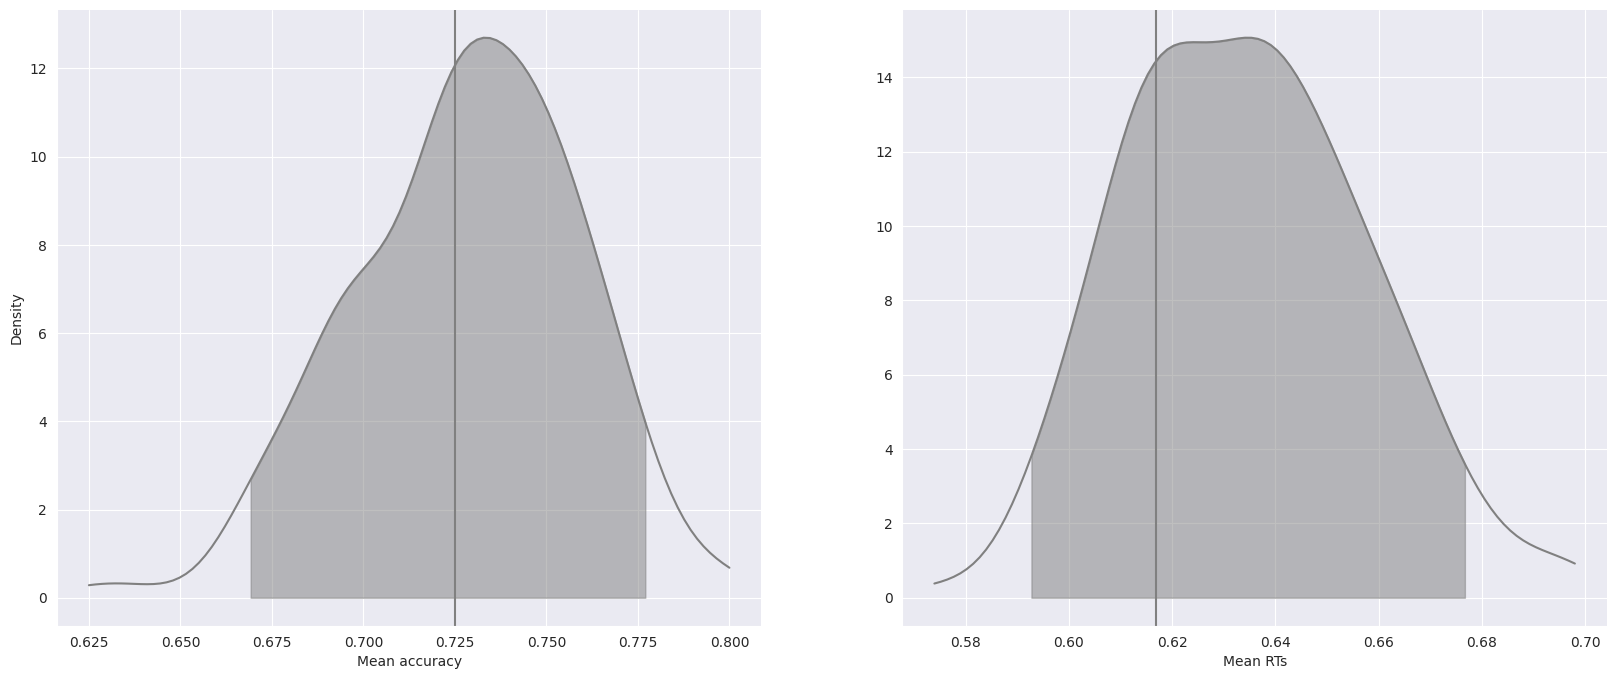

In [17]:
model_fit_ddm.plot_mean_posterior_predictives(n_posterior_predictives=200);

Quantile plots have 2 main visualization options, "shades" and "lines", and you can specify again which quantiles you want, which in tervals and alpha levels: 

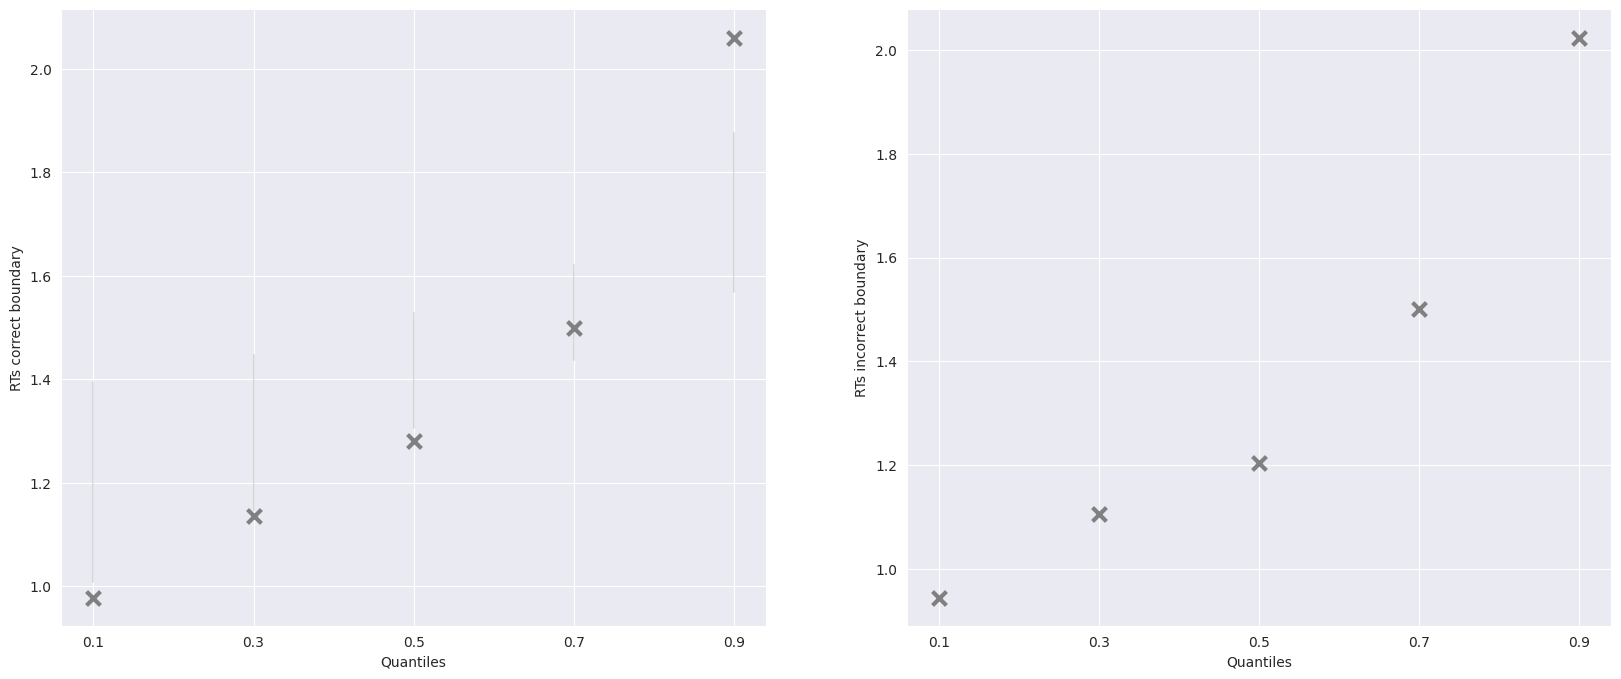

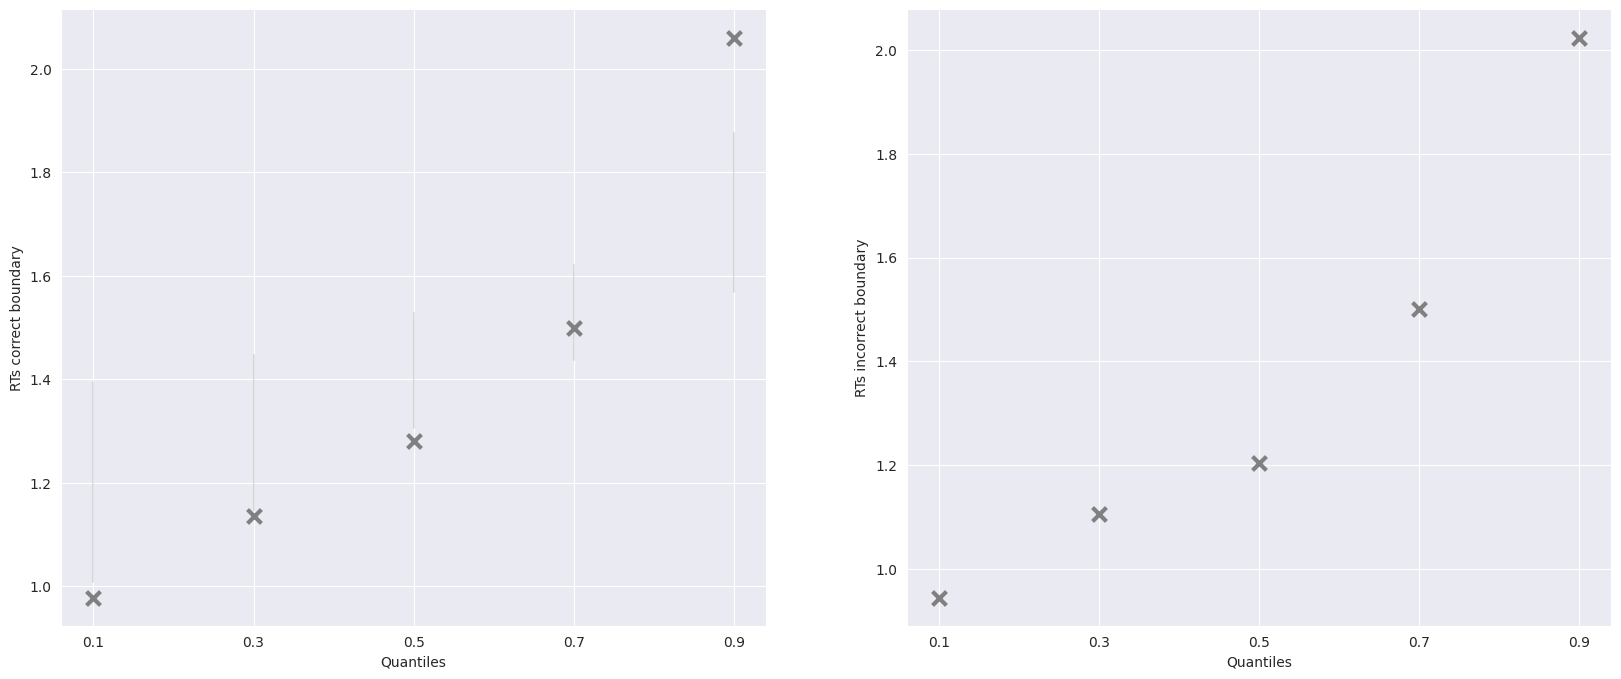

In [18]:
model_fit_lba.plot_quantiles_posterior_predictives(n_posterior_predictives=200);

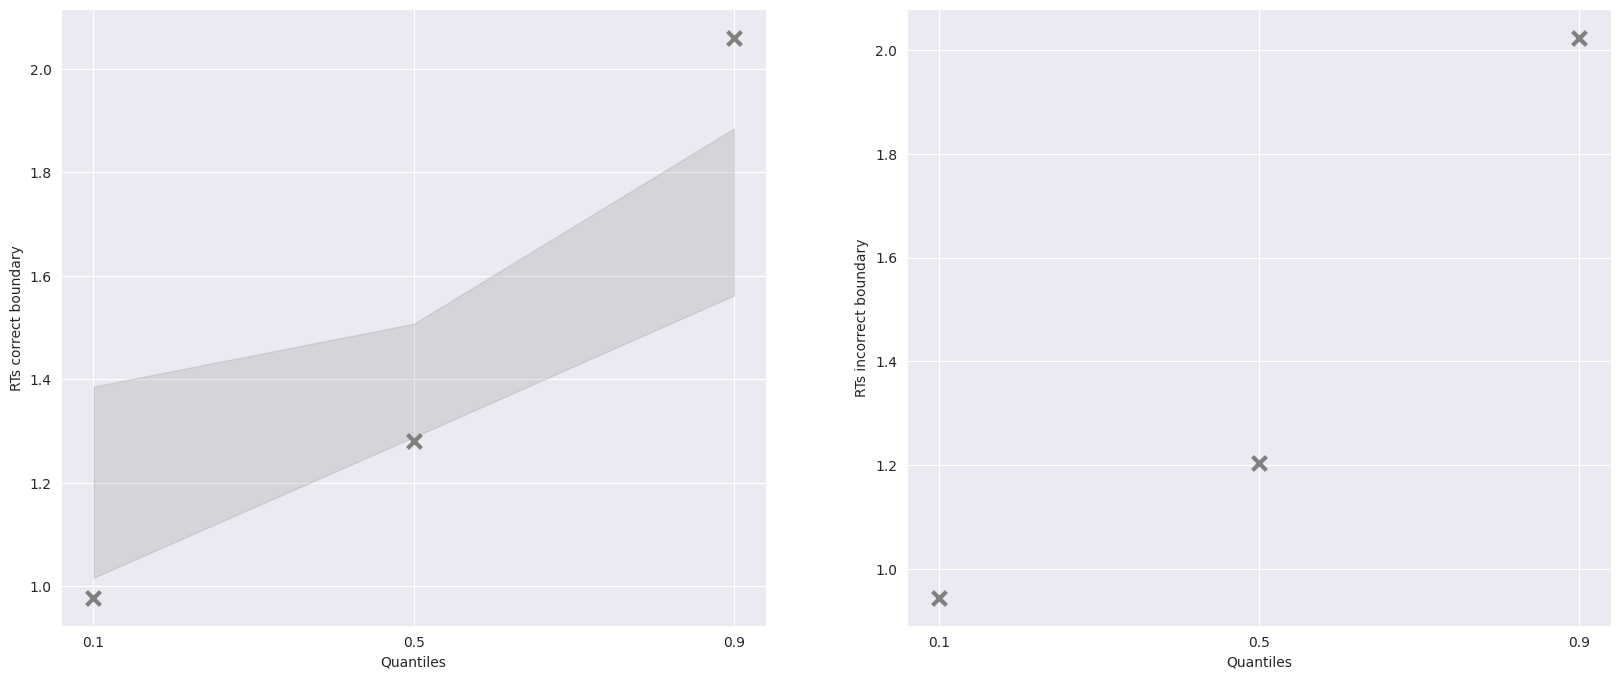

In [19]:
model_fit_lba.plot_quantiles_posterior_predictives(n_posterior_predictives=200,
                                                   kind='shades',
                                                   quantiles=[.1, .5, .9]);

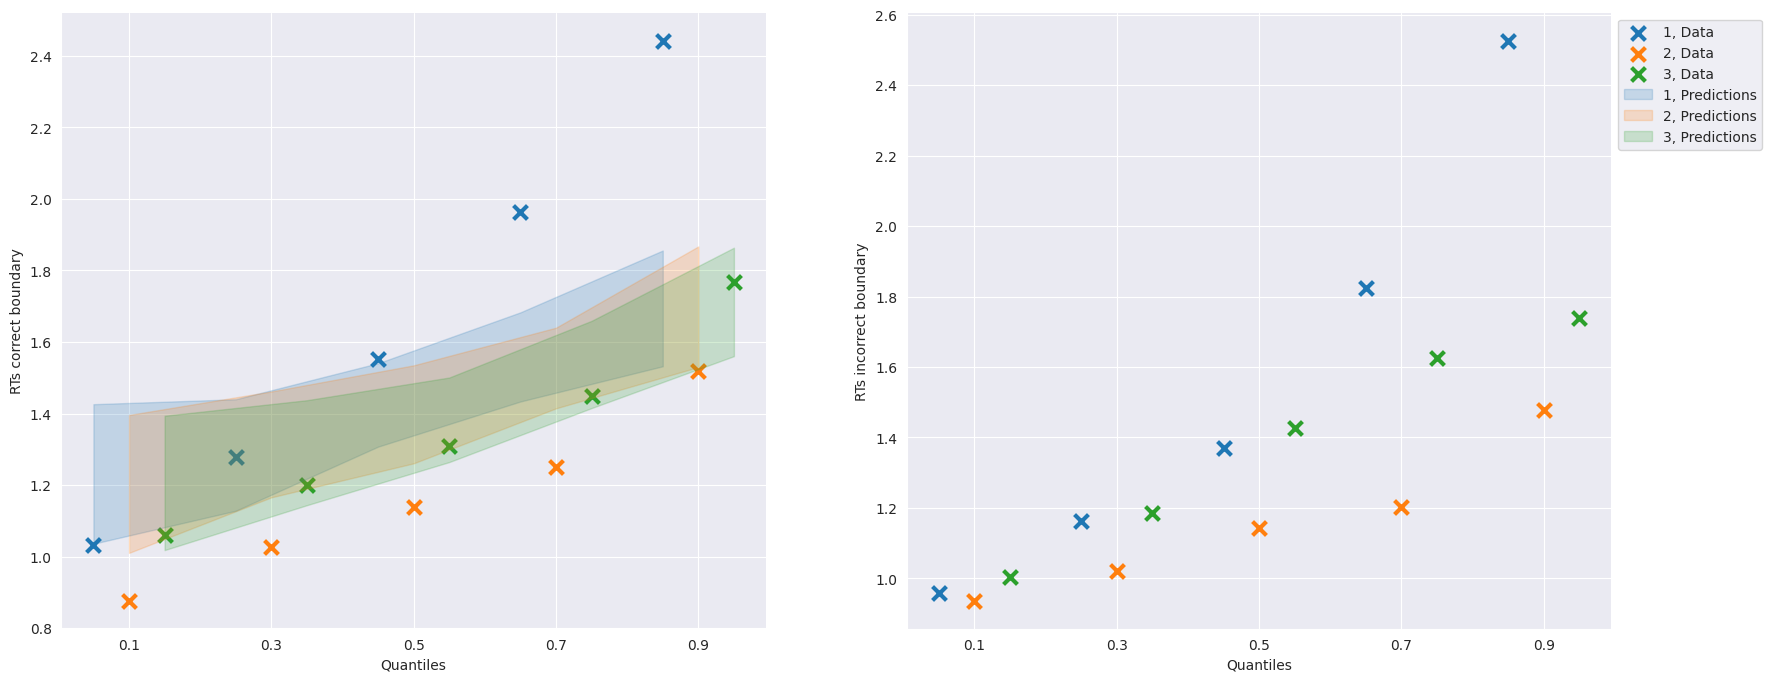

In [20]:
model_fit_lba.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='block_label',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);

In [21]:
# Define new grouping variables:

import pandas as pd
import numpy as np

data = model_fit_rl.data_info['data']

# add a column to the data to group trials across learning blocks
data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

# add a column to define which choice pair is shown in that trial
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

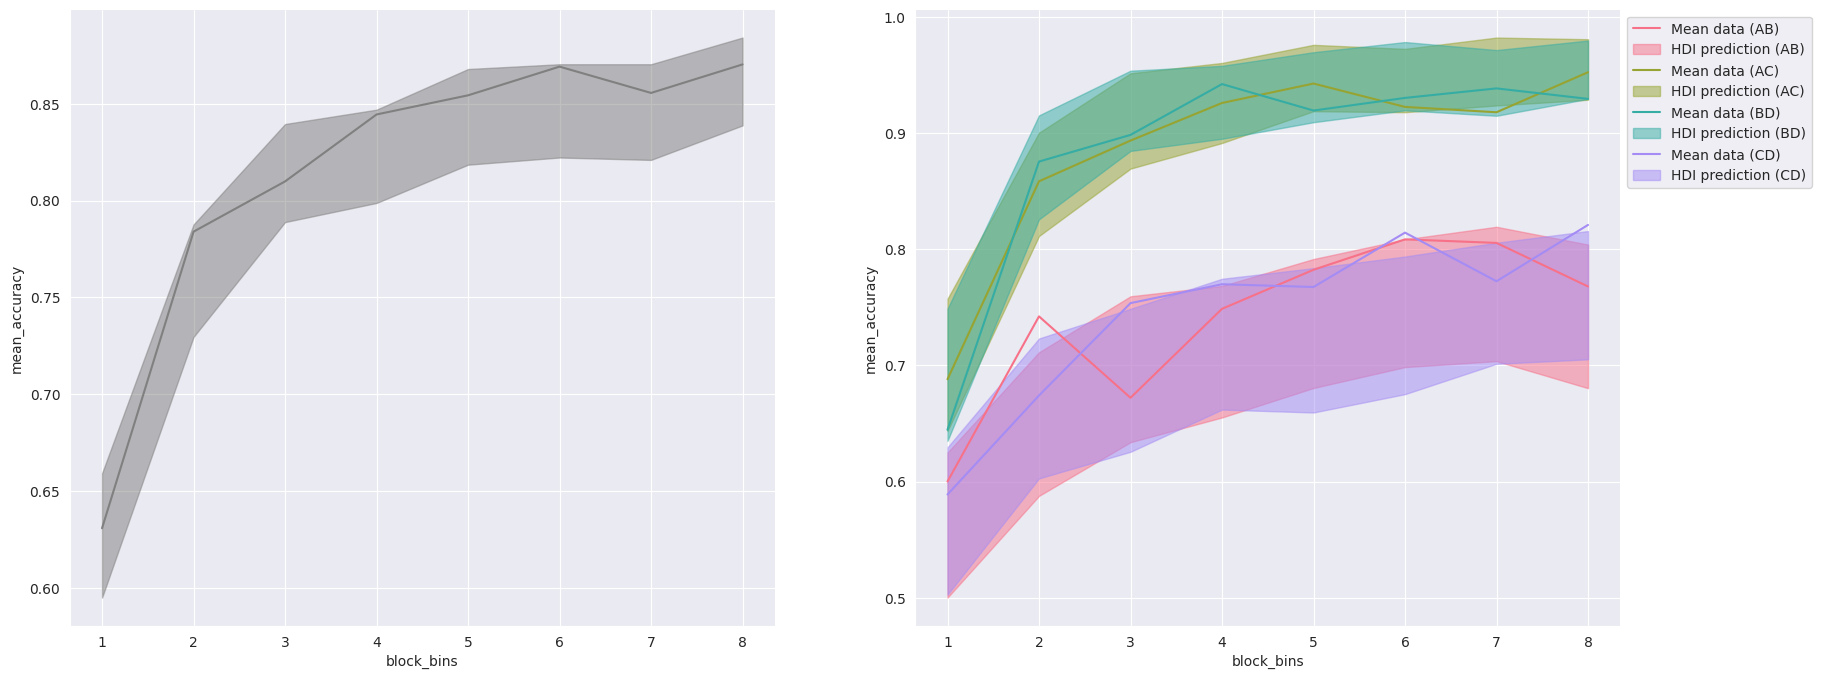

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(20,8))

model_fit_rl.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], n_posterior_predictives=500, ax=axes[0])

model_fit_rl.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins', 'choice_pair'], 
                                                     n_posterior_predictives=500, ax=axes[1])

sns.despine()